In [4]:
import cv2
import numpy as np
import cv2 as cv
import sys
import matplotlib.pyplot as plt
from skimage import io, transform
from skimage import filters
from skimage import color
from matplotlib.widgets import LassoSelector
from matplotlib import path

In [5]:
def calculate_energy(image):
    # Convertendo a imagem para escala de cinza
    gray_image = color.rgb2gray(image)
    # Calculando o gradiente da imagem
    energy = np.abs(filters.sobel_v(gray_image))
    return energy

def find_seam(energy):
    # A energia acumulada ao longo do caminho mínimo
    r, c = energy.shape
    M = energy.copy()
    backtrack = np.zeros_like(M, dtype=int)

    # Preenchendo a matriz de energia acumulada
    for j in range(1, c):
        for i in range(r):
            # Bordas são tratadas separadamente
            if i == 0:
                idx = np.argmin(M[i:i+2, j-1])
                backtrack[i, j] = idx + i
                min_energy = M[idx + i, j-1]
            else:
                idx = np.argmin(M[i-1:i+2, j-1])
                backtrack[i, j] = idx + i - 1
                min_energy = M[idx + i - 1, j-1]
            M[i, j] += min_energy

    return M, backtrack

def remove_seam(image, backtrack):
    r, c, _ = image.shape
    output = np.zeros((r - 1, c, 3), dtype=image.dtype)
    i = np.argmin(backtrack[:, -1])
    for j in reversed(range(c)):
        output[:, j, 0] = np.delete(image[:, j, 0], [i])
        output[:, j, 1] = np.delete(image[:, j, 1], [i])
        output[:, j, 2] = np.delete(image[:, j, 2], [i])
        i = backtrack[i, j]
    return output

def seam_carving(image, num_seams):
    for _ in range(num_seams):
        energy = calculate_energy(image)
        M, backtrack = find_seam(energy)
        image = remove_seam(image, backtrack)
    return image


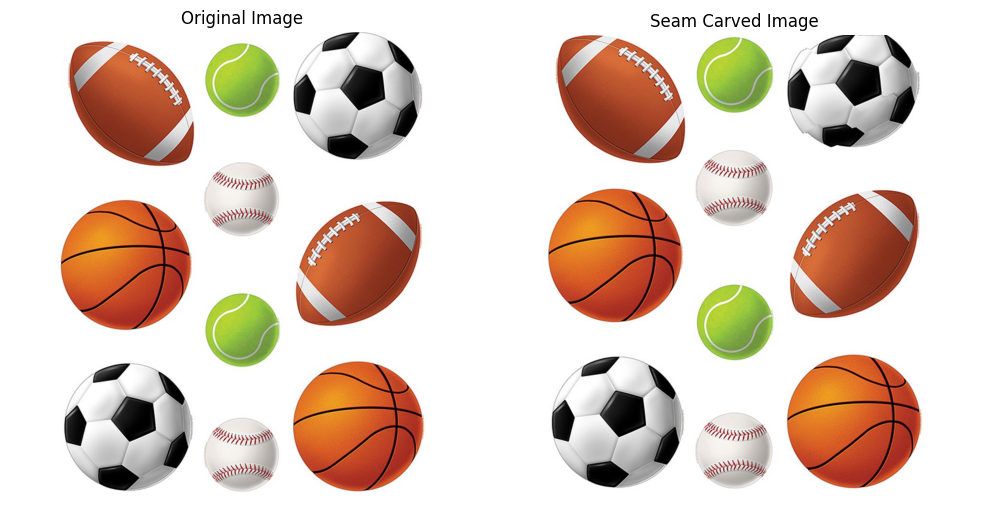

In [6]:
# Carregar a imagem
img = io.imread('/content/bolas2.jpg')

# Aplicar o seam carving
new_image = seam_carving(img, 40)  # Reduz 20 costuras

# Mostrar a imagem original e a modificada
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(new_image)
ax[1].set_title('Seam Carved Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()